# Support Vector Machine 

We are going to build a SVM to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.

The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.

Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. See the article (P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". (Machine Learning Vol 6 No.2 March 91)) for more details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/shyamgoyal/Desktop/UCI/Full Stack Data Scientist/Supervised Learning/SVM/letterdata.csv")

In [3]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
df.shape

(20000, 17)

In [8]:
#Spliting Data

X = np.array(df)[:,1:16]
y = np.array(df.letter)[:]

In [21]:
X.shape

(20000, 15)

In [52]:
#Creating Train Test Data Manually

X_train = X[0:16000,0:17]
X_test = X[16001:,:]
y_train = y[:16000]
y_test = y[16001:]

In [53]:
X_test

array([[6, 9, 8, ..., 6, 8, 0],
       [6, 9, 8, ..., 7, 9, 7],
       [5, 6, 6, ..., 0, 9, 4],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

## Build SVM Model

In [54]:
from sklearn import svm

In [55]:
model = svm.SVC(C=3)
model

SVC(C=3)

In [56]:
model.fit(X_train,y_train)

SVC(C=3)

In [57]:
y_pred = model.predict(X_test)

In [58]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [61]:
y_grid = (np.column_stack([y_test,y_pred]))
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [64]:
import string
lab = list(string.ascii_uppercase[0:26])
plab = ['Predicted '+ s for s in lab]

In [65]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

In [66]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [71]:
#Creating confusion Matrics

from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test,y_pred, labels=lab)

df_cm = pd.DataFrame(cm,index = [i for i in lab],
                     columns = [i for i in plab])

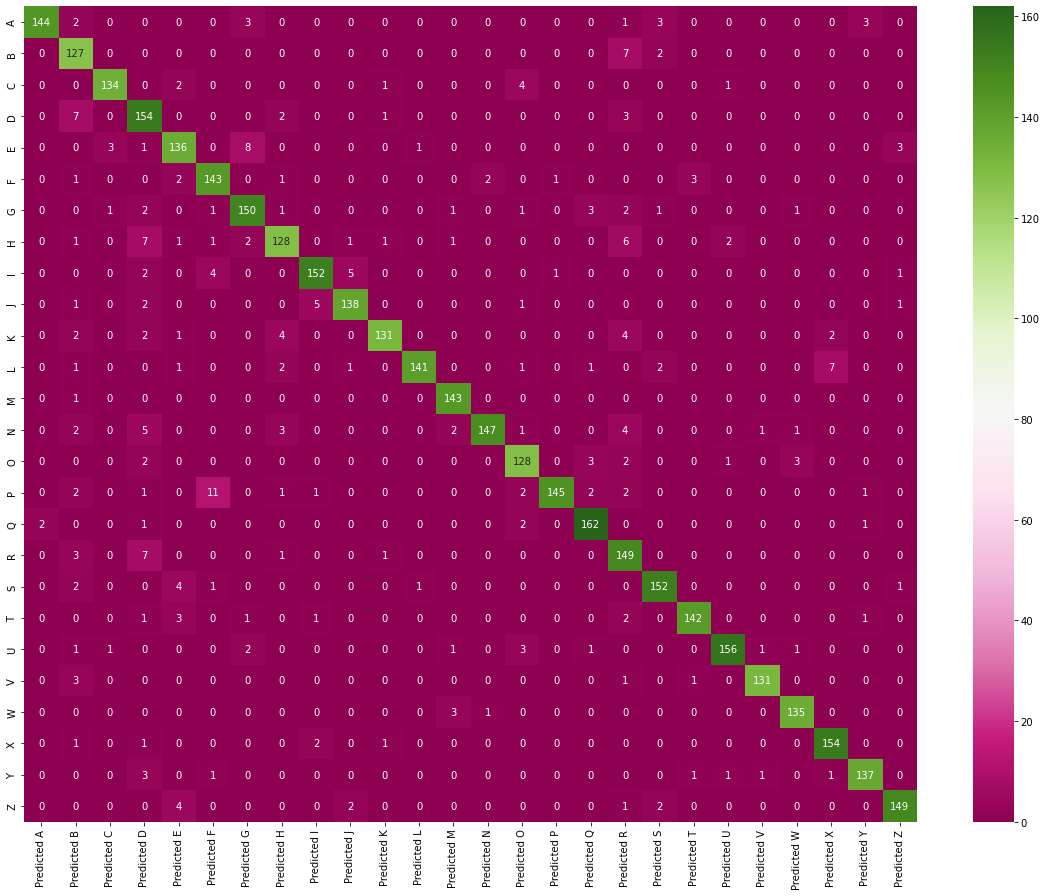

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cm, annot=True, fmt = 'g', cmap="PiYG")
plt.show()